In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 29_Global Alcohol Consumptions Analysis 2010 By Alfin Bahru Rahmika Umar\drinks.csv")
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (193, 5)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
print("Data awal:")
print(df.info())
print("Jumlah baris awal:", df.shape[0])

# Deteksi data duplikat dan missing values
duplikat = df[df.duplicated()]
print("\nData duplikat:")
print(duplikat)

missing = df.isnull().sum()
print("\nMissing values per kolom:")
print(missing)

Data awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB
None
Jumlah baris awal: 193

Data duplikat:
Empty DataFrame
Columns: [country, beer_servings, spirit_servings, wine_servings, total_litres_of_pure_alcohol]
Index: []

Missing values per kolom:
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64


In [7]:
# Salin data asli sebagai data sebelum cleaning
df_before = df.copy()

# Data Cleaning:
# 1. Hapus duplikat dan missing values
df_clean = df.drop_duplicates().dropna()

# 2. Menghapus outliers dengan metode IQR untuk kolom numerik
numeric_cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_rows = df_clean.shape[0]
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    after_rows = df_clean.shape[0]
    print(f"\nPenghapusan outlier untuk {col}: {before_rows - after_rows} baris dihapus.")


Penghapusan outlier untuk beer_servings: 0 baris dihapus.

Penghapusan outlier untuk spirit_servings: 5 baris dihapus.

Penghapusan outlier untuk wine_servings: 26 baris dihapus.

Penghapusan outlier untuk total_litres_of_pure_alcohol: 0 baris dihapus.


In [8]:
# Membandingkan data sebelum dan sesudah cleaning
print("\nJumlah baris sebelum cleaning:", df_before.shape[0])
print("Jumlah baris setelah cleaning:", df_clean.shape[0])


Jumlah baris sebelum cleaning: 193
Jumlah baris setelah cleaning: 162


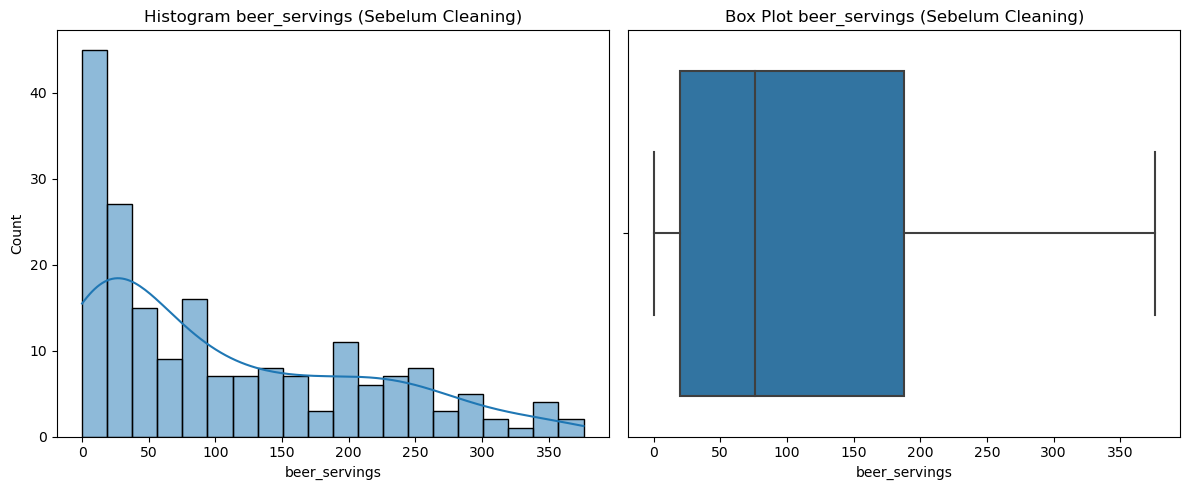

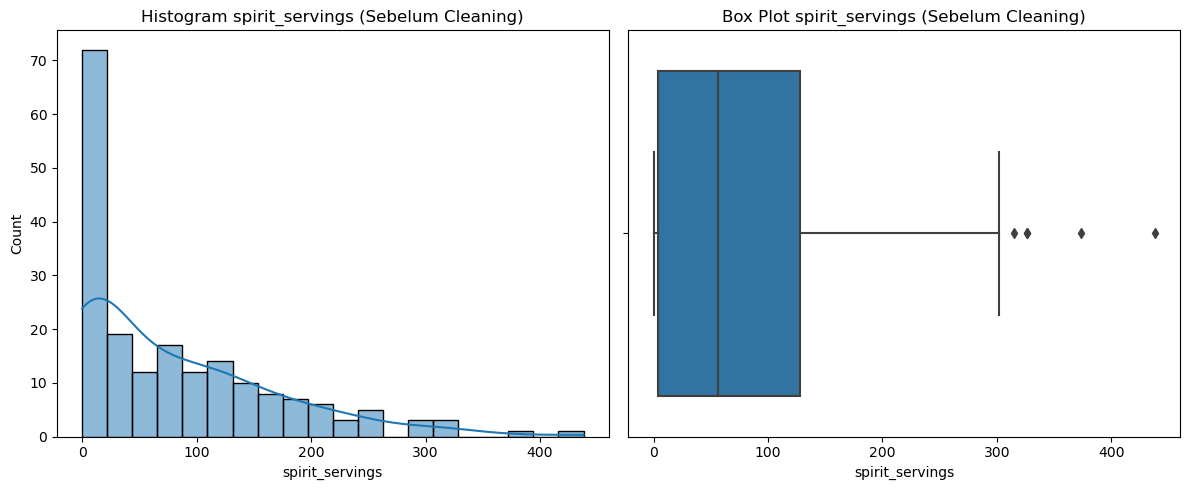

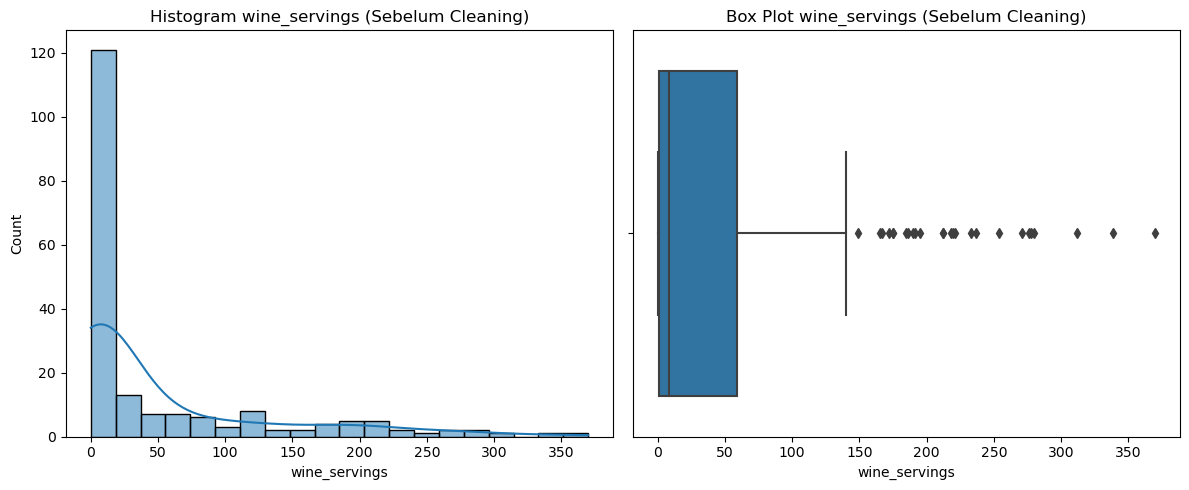

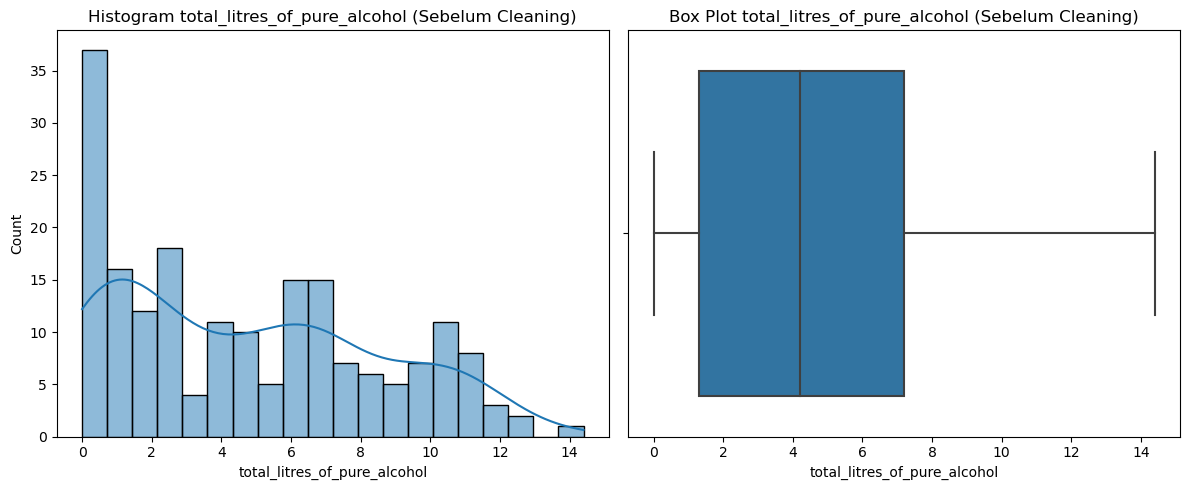

In [9]:
# Visualisasi: Histogram dan Box Plot untuk tiap kolom numerik (sebelum cleaning)
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[col], kde=True, bins=20)
    plt.title(f"Histogram {col} (Sebelum Cleaning)")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_before[col])
    plt.title(f"Box Plot {col} (Sebelum Cleaning)")
    plt.tight_layout()
    plt.show()

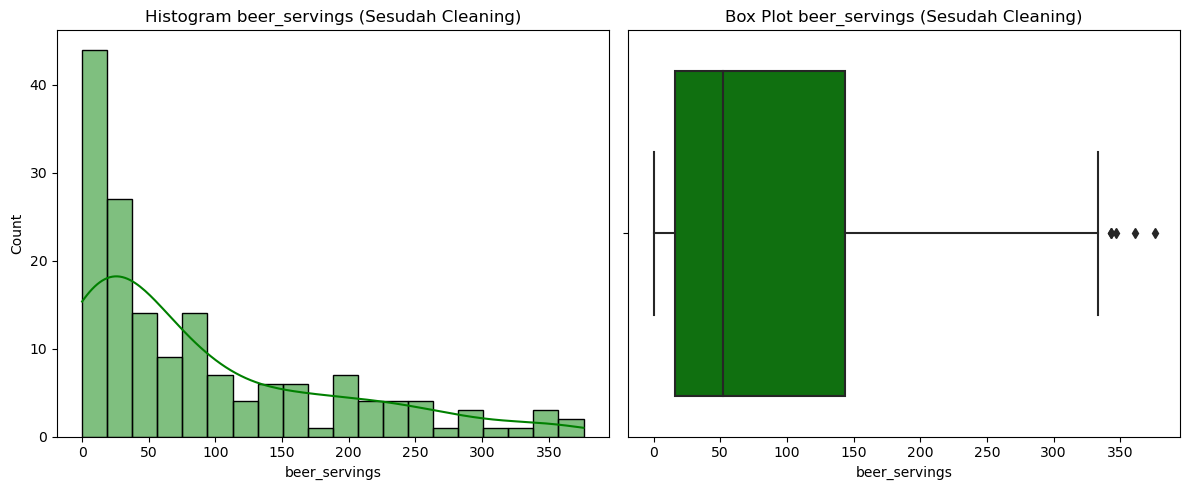

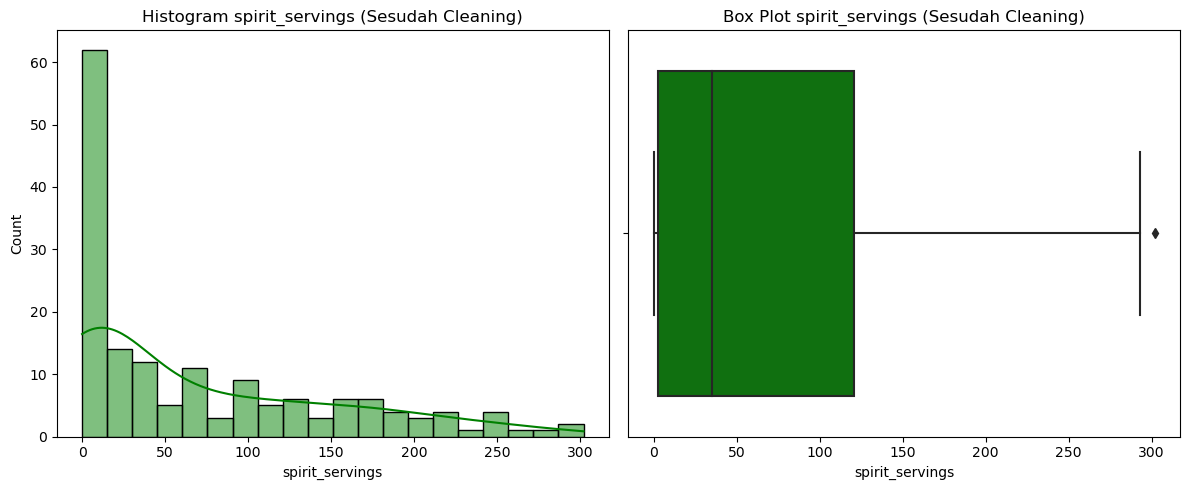

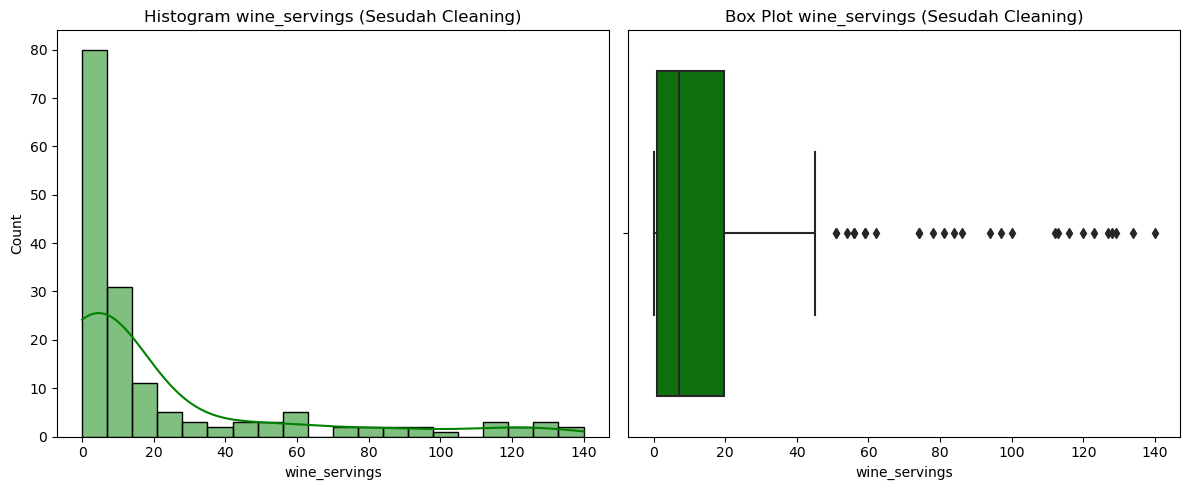

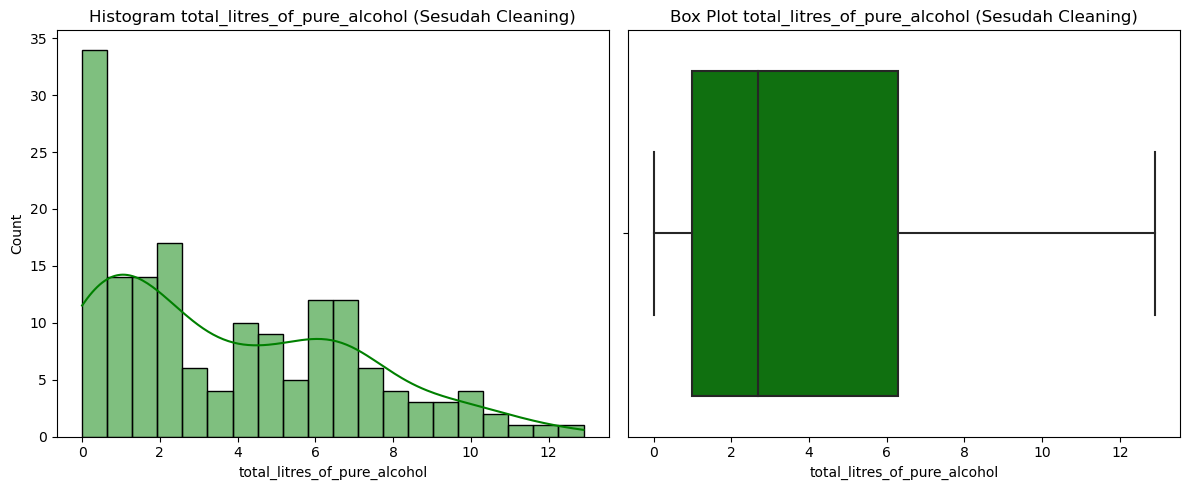

In [10]:
# Visualisasi: Histogram dan Box Plot untuk tiap kolom numerik (sesudah cleaning)
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[col], kde=True, bins=20, color="green")
    plt.title(f"Histogram {col} (Sesudah Cleaning)")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[col], color="green")
    plt.title(f"Box Plot {col} (Sesudah Cleaning)")
    plt.tight_layout()
    plt.show()

In [11]:
# Menyimpan dataset hasil cleaning
cleaned_filename = "drinks_cleaned.csv"
df_clean.to_csv(cleaned_filename, index=False)
print(f"\nDataset hasil cleaning disimpan sebagai: {cleaned_filename}")


Dataset hasil cleaning disimpan sebagai: drinks_cleaned.csv


In [12]:
# Menghitung metrik terukur dari data yang sudah dibersihkan
total_beer_servings = df_clean['beer_servings'].sum()
total_spirit_servings = df_clean['spirit_servings'].sum()
total_wine_servings = df_clean['wine_servings'].sum()
total_alcohol = df_clean['total_litres_of_pure_alcohol'].sum()
total_countries = df_clean['country'].nunique()

print("Total Beer Servings       :", total_beer_servings)
print("Total Spirit Servings     :", total_spirit_servings)
print("Total Wine Servings       :", total_wine_servings)
print("Total Litres Alcohol      :", total_alcohol)
print("Total Surveyed Countries  :", total_countries)

Total Beer Servings       : 14368
Total Spirit Servings     : 11452
Total Wine Servings       : 3446
Total Litres Alcohol      : 608.8
Total Surveyed Countries  : 162


In [22]:
# Bar Chart 20 besar konsumsi per jenis minuman
def plot_top20(df, column, title):
    top20 = df.sort_values(by=column, ascending=False).head(20)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=top20, x=column, y="country", palette="viridis")
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Country")
    
    # Menambahkan keterangan nilai di setiap bar
    for patch in ax.patches:
        # Mendapatkan nilai lebar bar
        value = patch.get_width()
        # Mendapatkan posisi y dan tinggi bar untuk menentukan posisi teks
        y = patch.get_y() + patch.get_height() / 2
        # Menambahkan teks di sebelah kanan bar
        ax.text(value + 1, y, f'{int(value)}', va='center', ha='left', fontsize=10)
    
    plt.tight_layout()
    plt.show()


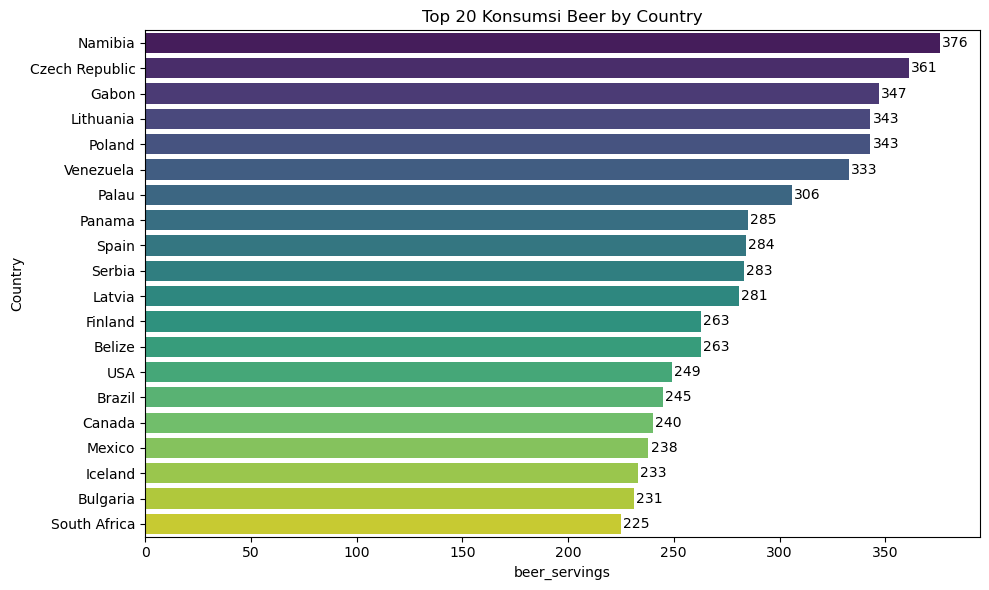

In [23]:
plot_top20(df_clean, "beer_servings", "Top 20 Konsumsi Beer by Country")

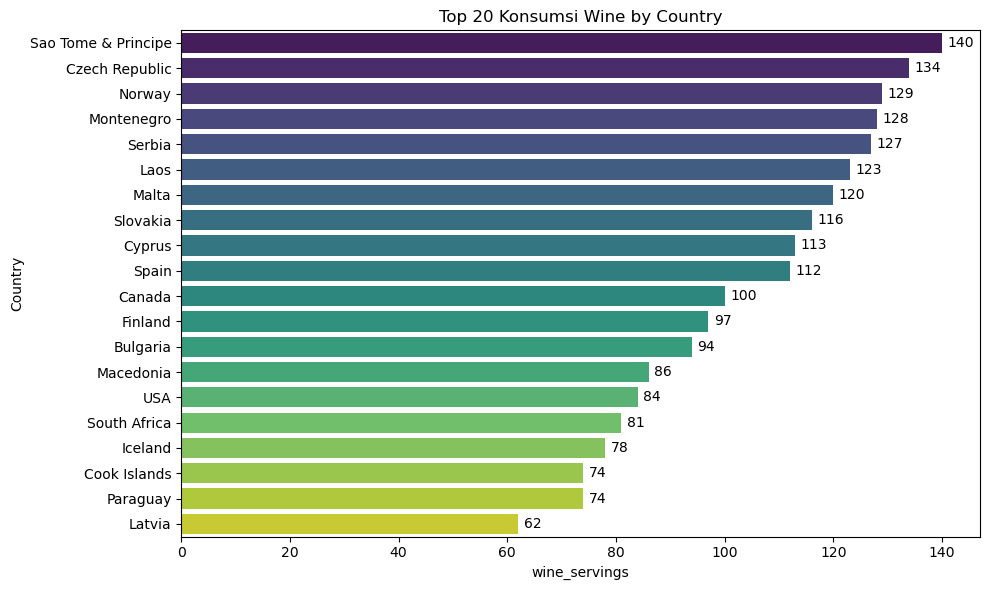

In [24]:
plot_top20(df_clean, "wine_servings", "Top 20 Konsumsi Wine by Country")

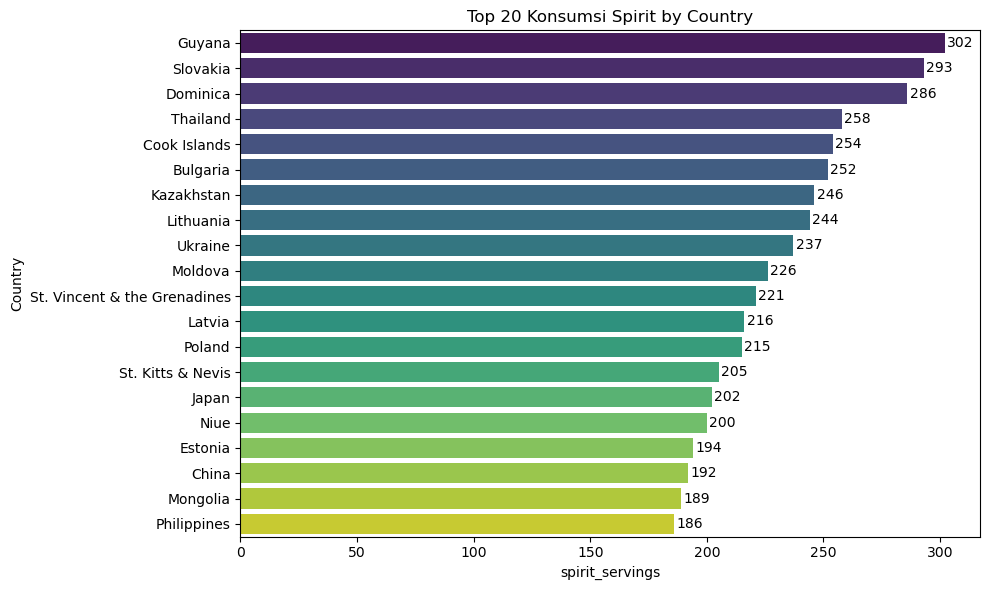

In [25]:
plot_top20(df_clean, "spirit_servings", "Top 20 Konsumsi Spirit by Country")

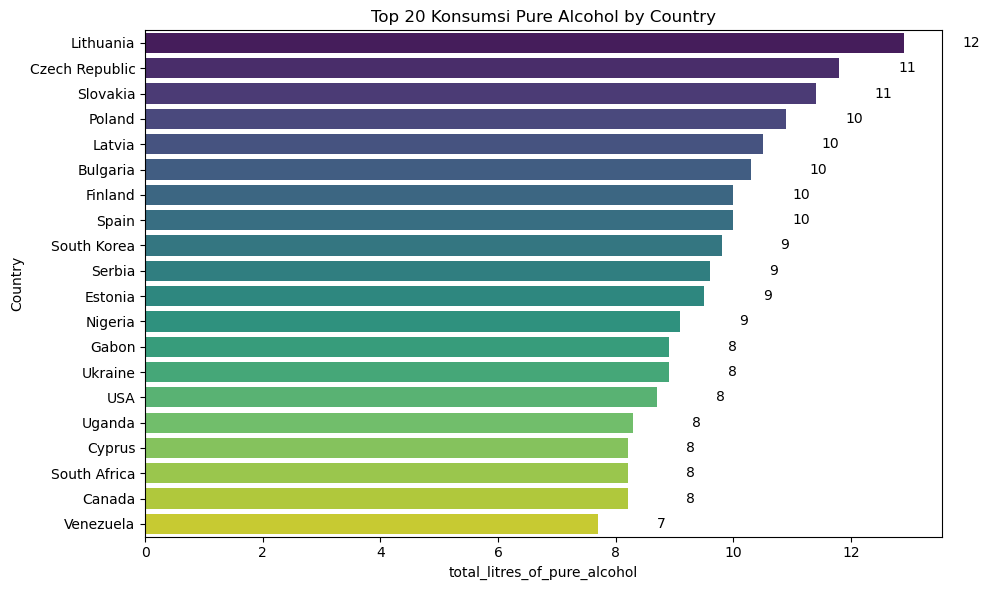

In [26]:
plot_top20(df_clean, "total_litres_of_pure_alcohol", "Top 20 Konsumsi Pure Alcohol by Country")

In [21]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Membaca dataset yang sudah dibersihkan
# df_clean = pd.read_csv("drinks_cleaned.csv")

# # Menghitung metrik
# total_beer_servings = df_clean['beer_servings'].sum()
# total_spirit_servings = df_clean['spirit_servings'].sum()
# total_wine_servings = df_clean['wine_servings'].sum()
# total_alcohol = df_clean['total_litres_of_pure_alcohol'].sum()
# total_countries = df_clean['country'].nunique()

# # Tampilan dashboard
# st.title("Drinks Data Analysis Dashboard")

# st.header("Metrik Utama")
# col1, col2, col3 = st.columns(3)
# col1.metric("Total Beer Servings", total_beer_servings)
# col2.metric("Total Wine Servings", total_wine_servings)
# col3.metric("Total Spirit Servings", total_spirit_servings)
# st.metric("Total Litres of Pure Alcohol", total_alcohol)
# st.metric("Total Surveyed Countries", total_countries)

# # Fungsi untuk membuat bar chart top 20
# def plot_top20(df, column, title):
#     top20 = df.sort_values(by=column, ascending=False).head(20)
#     fig, ax = plt.subplots(figsize=(10, 6))
#     sns.barplot(data=top20, x=column, y="country", palette="viridis", ax=ax)
#     ax.set_title(title)
#     st.pyplot(fig)

# st.header("Top 20 Konsumsi Masing-Masing Minuman")
# plot_top20(df_clean, "beer_servings", "Top 20 Konsumsi Beer by Country")
# plot_top20(df_clean, "wine_servings", "Top 20 Konsumsi Wine by Country")
# plot_top20(df_clean, "spirit_servings", "Top 20 Konsumsi Spirit by Country")
# plot_top20(df_clean, "total_litres_of_pure_alcohol", "Top 20 Konsumsi Pure Alcohol by Country")
